In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("StudentsPerformance.csv")

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.shape

(1000, 8)

In [6]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
data.drop("math score", axis = 1, inplace = True)

In [11]:
data.drop("writing score", axis = 1, inplace = True)

In [12]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score
0,female,group B,bachelor's degree,standard,none,72
1,female,group C,some college,standard,completed,90
2,female,group B,master's degree,standard,none,95
3,male,group A,associate's degree,free/reduced,none,57
4,male,group C,some college,standard,none,78


In [13]:
data = pd.get_dummies(data, drop_first = True)

In [14]:
data.head()

,reading score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,0,1,0,0,0,1,0,0,0,0,1,1
1,90,0,0,1,0,0,0,0,0,1,0,1,0
2,95,0,1,0,0,0,0,0,1,0,0,1,1
3,57,1,0,0,0,0,0,0,0,0,0,0,1
4,78,1,0,1,0,0,0,0,0,1,0,1,1


In [16]:
X = data.loc[:, ["race/ethnicity_group B", "race/ethnicity_group C", "race/ethnicity_group D", "race/ethnicity_group E", "parental level of education_bachelor's degree", "parental level of education_high school", "parental level of education_master's degree"]].values
Y = data.loc[:, ["test preparation course_none"]].values

In [17]:
X

array([[1, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [18]:
X.shape

(1000, 7)

In [19]:
Y = Y.reshape(-1)

In [20]:
Y.shape

(1000,)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0, test_size = 0.30)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
acc_list = []
err_list = []
for i in range (1, 25):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    acc_list.append(acc)
    err_list.append(1-acc)

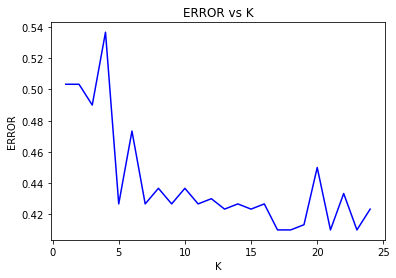

In [25]:
plt.plot(list(range(1,25)), err_list, c = "b")
plt.title("ERROR vs K")
plt.xlabel("K")
plt.ylabel("ERROR")
plt.show()

In [26]:
model = KNeighborsClassifier(n_neighbors = 9)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [27]:
confusion_matrix(Y_test, Y_pred)

array([[ 25,  75],
       [ 53, 147]], dtype=int64)

In [28]:
accuracy_score(Y_test, Y_pred)

0.5733333333333334

In [29]:
import pickle

In [30]:
filename = "save_model.sav"
pickle.dump(model, open(filename, "wb"))